In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from utils import plot_clusters, plot
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from arch import arch_model
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from sktime.forecasting.arima import AutoARIMA
import numpy as np

In [2]:
df = pd.read_csv("ЦУР1.csv", decimal=',')

In [3]:
df

,ЦУР,Субъект РФ,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,1.2.2,РФ,"13,2","12,9","12,6","12,3","12,1","11,","9,8",NaN,NaN
1,1.2.2,ЮФО,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.2.2,РО,"14,2","13,9","13,2","13,3","13,","12,","10,5",NaN,NaN
3,1.3.1,РФ,230 710,299 752,308 815,326 293,604 856,980 845,909 426,NaN,NaN
4,1.3.1,Республика Адыгея (Адыгея),"139,","112,","118,","128,","143,",NaN,"2715,",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
65,Т.1.4.3,РО,"141,62","105,6","101,","103,9","100,3","98,5","101,5",NaN,NaN
66,Т.1.5 Все население,РО,"9565,","9667,","9675,","10337,","10793,","11053,","13085,",NaN,NaN
67,Т.1.5 Трудоспособное население,РО,"10170,","10280,","10282,","11013,","11481,","11753,","14263,",NaN,NaN
68,Т.1.5 Пенсионеры,РО,"7753,","7832,","7843,","8384,","8722,","9445,","11253,",NaN,NaN


In [4]:
df.drop(["2023", "2024"], axis=1, inplace=True)

In [5]:
df.set_index("ЦУР", inplace=True)

In [6]:
numeric_columns = df.columns[1:]
numeric_columns

Index(['2016', '2017', '2018', '2019', '2020', '2021', '2022'], dtype='object')

In [7]:
for num_col in numeric_columns:
    df[num_col] = df[num_col].str.replace(",", ".")
    df[num_col] = df[num_col].str.replace(" ", "")

In [8]:
df

,Субъект РФ,2016,2017,2018,2019,2020,2021,2022
ЦУР,,,,,,,,
1.2.2,РФ,13.2,12.9,12.6,12.3,12.1,11.,9.8
1.2.2,ЮФО,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.2.2,РО,14.2,13.9,13.2,13.3,13.,12.,10.5
1.3.1,РФ,230710,299752,308815,326293,604856,980845,909426
1.3.1,Республика Адыгея (Адыгея),139.,112.,118.,128.,143.,NaN,2715.
...,...,...,...,...,...,...,...,...
Т.1.4.3,РО,141.62,105.6,101.,103.9,100.3,98.5,101.5
Т.1.5 Все население,РО,9565.,9667.,9675.,10337.,10793.,11053.,13085.
Т.1.5 Трудоспособное население,РО,10170.,10280.,10282.,11013.,11481.,11753.,14263.


In [9]:
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric)

### Ростовская область

In [10]:
df_ro = df[df["Субъект РФ"] == "РО"]
df_ro.head()

,Субъект РФ,2016,2017,2018,2019,2020,2021,2022
ЦУР,,,,,,,,
1.2.2,РО,14.2,13.9,13.2,13.3,13.00,12.00,10.50
1.3.1,РО,2241.0,2029.0,4905.0,8689.0,6921.00,NaN,23687.00
1.4.1,РО,61.2,63.0,64.3,67.5,66.97,68.74,73.74
1.4.2,РО,6227.1,6233.7,6246.6,6255.6,6241.60,6245.70,6271.70
1.5.1 Пострадавшие,РО,135.0,648.0,50.0,61.0,281.00,235.00,NaN


In [11]:
df_ro.drop("Субъект РФ", axis=1, inplace=True)

C:\Users\yxtag\AppData\Local\Temp\ipykernel_5768\3480877717.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ro.drop("Субъект РФ", axis=1, inplace=True)


#### Пропуски

In [12]:
nan_rows = df_ro[df_ro.isna().any(axis=1)]

In [13]:
nan_rows

,2016,2017,2018,2019,2020,2021,2022
ЦУР,,,,,,,
1.3.1,2241.0,2029.0,4905.0,8689.0,6921.0,NaN,23687.00
1.5.1 Пострадавшие,135.0,648.0,50.0,61.0,281.0,235.0,NaN
1.5.1 Погибшие,77.0,12.0,21.0,20.0,15.0,30.0,NaN
1.5.2,61340.0,3819811.8,NaN,51276.0,451548.0,16227.0,4027.89


In [14]:
nan_rows

,2016,2017,2018,2019,2020,2021,2022
ЦУР,,,,,,,
1.3.1,2241.0,2029.0,4905.0,8689.0,6921.0,NaN,23687.00
1.5.1 Пострадавшие,135.0,648.0,50.0,61.0,281.0,235.0,NaN
1.5.1 Погибшие,77.0,12.0,21.0,20.0,15.0,30.0,NaN
1.5.2,61340.0,3819811.8,NaN,51276.0,451548.0,16227.0,4027.89


Заполним предыдущим значением

In [15]:
# df_ro[df_ro.isna().any(axis=1)] = df_ro[df_ro.isna().any(axis=1)].fillna(method="ffill", axis=1)

Заполним пропуски с помощью интерполяции

In [16]:
df_ro[df_ro.isna().any(axis=1)] = df_ro[df_ro.isna().any(axis=1)].T.interpolate(method="linear", limit_direction='both').T

C:\Users\yxtag\AppData\Local\Temp\ipykernel_5768\3599901758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ro[df_ro.isna().any(axis=1)] = df_ro[df_ro.isna().any(axis=1)].T.interpolate(method="linear", limit_direction='both').T


In [17]:
df_ro

,2016,2017,2018,2019,2020,2021,2022
ЦУР,,,,,,,
1.2.2,14.20,13.9,13.2,13.3,13.00,12.00,10.50
1.3.1,2241.00,2029.0,4905.0,8689.0,6921.00,15304.00,23687.00
1.4.1,61.20,63.0,64.3,67.5,66.97,68.74,73.74
1.4.2,6227.10,6233.7,6246.6,6255.6,6241.60,6245.70,6271.70
1.5.1 Пострадавшие,135.00,648.0,50.0,61.0,281.00,235.00,235.00
1.5.1 Погибшие,77.00,12.0,21.0,20.0,15.00,30.00,30.00
1.5.2,61340.00,3819811.8,1935543.9,51276.0,451548.00,16227.00,4027.89
1.а.1,10.10,11.4,9.7,9.6,10.10,9.30,10.10
1.а.2 Образование,23.40,24.1,27.4,24.5,22.50,21.80,22.30


#### Нормализация

Приводим каждую строку к нормальному распределению (E=0 D=1)

In [18]:
scaler = StandardScaler()

In [19]:
scaled_rows = []
for i in range(df_ro.shape[0]):
    row = df_ro.iloc[i]
    scaled_row = scaler.fit_transform(row.values.reshape(-1, 1))
    scaled_rows.append([el[0] for el in scaled_row.tolist()])

# Convert the scaled rows back to a DataFrame
scaled_df_ro = pd.DataFrame(scaled_rows, columns=df_ro.columns)

In [20]:
scaled_df_ro.set_index(df_ro.index, inplace=True)

#### Матрица корреляций

In [21]:
scaled_df_ro.T.corr()

ЦУР,1.2.2,1.3.1,1.4.1,1.4.2,1.5.1 Пострадавшие,1.5.1 Погибшие,1.5.2,1.а.1,1.а.2 Образование,1.а.2 Здравоохранение,...,1.b.1,Т.1.3.1,Т.1.3.2,Т.1.4.1,Т.1.4.2,Т.1.4.3,Т.1.5 Все население,Т.1.5 Трудоспособное население,Т.1.5 Пенсионеры,Т.1.5 Дети
ЦУР,,,,,,,,,,,,,,,,,,,,,
1.2.2,1.000000,-0.980139,-0.954351,-0.857816,0.105963,0.207979,0.426046,0.332105,0.446062,0.285613,...,-0.964426,-0.432690,0.999999,-0.989527,-0.900284,0.528730,-0.959124,-0.956094,-0.972757,-0.963311
1.3.1,-0.980139,1.000000,0.960121,0.860048,-0.155322,-0.115486,-0.529148,-0.386472,-0.516535,-0.263145,...,0.931759,0.405251,-0.980127,0.989649,0.935216,-0.444745,0.959917,0.956421,0.977875,0.961552
1.4.1,-0.954351,0.960121,1.000000,0.918080,-0.130448,-0.332167,-0.482056,-0.355116,-0.466886,-0.340528,...,0.911903,0.422012,-0.954423,0.977763,0.833709,-0.606245,0.953974,0.947406,0.946455,0.956149
1.4.2,-0.857816,0.860048,0.918080,1.000000,-0.290751,-0.362176,-0.377719,-0.352396,-0.117141,-0.399142,...,0.810914,0.459142,-0.857624,0.856403,0.770856,-0.583996,0.832962,0.837405,0.816935,0.811415
1.5.1 Пострадавшие,0.105963,-0.155322,-0.130448,-0.290751,1.000000,-0.349669,0.688645,0.851579,-0.295966,-0.665294,...,0.106188,-0.043794,0.106227,-0.090775,-0.091927,-0.145511,-0.037009,-0.035151,-0.032063,-0.031084
1.5.1 Погибшие,0.207979,-0.115486,-0.332167,-0.362176,-0.349669,1.000000,-0.443827,-0.168917,-0.176885,0.576941,...,-0.234444,-0.581771,0.208542,-0.214815,-0.046329,0.910448,-0.144222,-0.132505,-0.108178,-0.157302
1.5.2,0.426046,-0.529148,-0.482056,-0.377719,0.688645,-0.443827,1.000000,0.765442,0.483735,-0.535405,...,-0.267848,0.138935,0.426291,-0.483535,-0.373340,-0.159388,-0.486444,-0.473447,-0.480994,-0.499212
1.а.1,0.332105,-0.386472,-0.355116,-0.352396,0.851579,-0.168917,0.765442,1.000000,0.021637,-0.637227,...,-0.075776,-0.364224,0.333047,-0.343414,-0.335617,0.148390,-0.214079,-0.194209,-0.236578,-0.242690
1.а.2 Образование,0.446062,-0.516535,-0.466886,-0.117141,-0.295966,-0.176885,0.483735,0.021637,1.000000,0.050220,...,-0.479709,0.181569,0.446186,-0.533659,-0.405256,-0.021835,-0.583905,-0.566848,-0.592755,-0.614272


<Axes: xlabel='ЦУР', ylabel='ЦУР'>

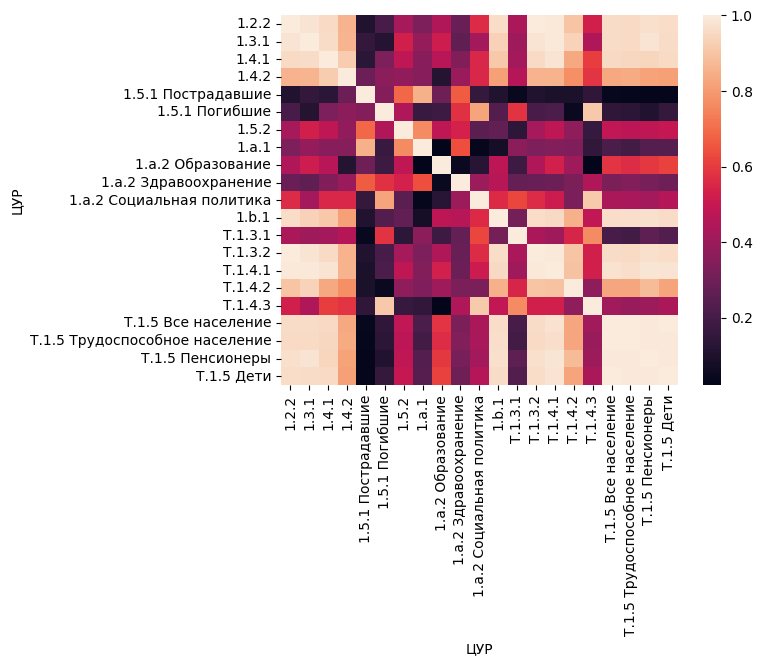

In [22]:
sns.heatmap(scaled_df_ro.T.corr().abs())

#### Скоращение размерности и визуализация

In [23]:
pca = PCA(n_components=2)

In [24]:
df_dim_red = pca.fit_transform(scaled_df_ro)

In [25]:
df_dim_red = pd.DataFrame(data=df_dim_red, columns=['PC1', 'PC2'], index=df_ro.index)

In [26]:
df_dim_red

,PC1,PC2
ЦУР,,
1.2.2,3.354684,0.078210
1.3.1,-1.847382,0.433095
1.4.1,-1.870416,0.053462
1.4.2,-1.604145,-0.103273
1.5.1 Пострадавшие,1.059850,-1.636822
1.5.1 Погибшие,1.487677,2.380246
1.5.2,2.001538,-2.065972
1.а.1,1.711685,-1.392879
1.а.2 Образование,2.031594,-0.667946


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


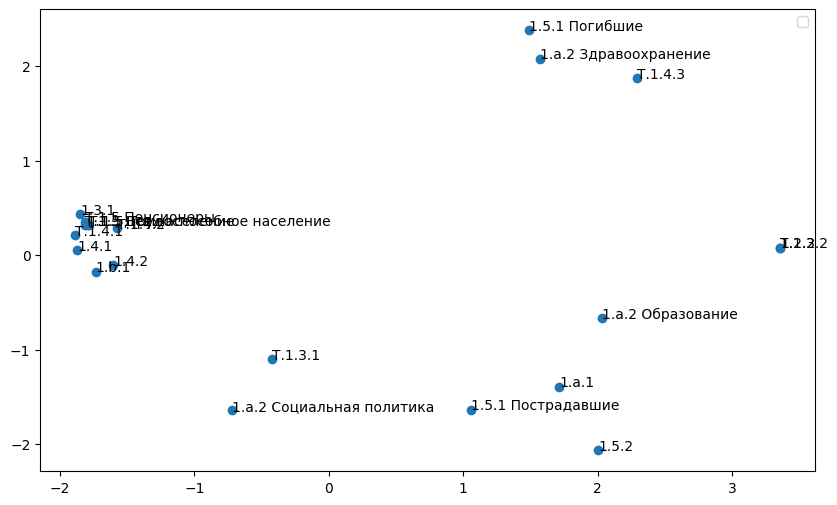

In [27]:
plot(df_dim_red, "PC1", "PC2")

#### Кластеризация

In [28]:
hierarchial_clustering = AgglomerativeClustering(distance_threshold=2, n_clusters=None)

In [29]:
scaled_df_ro.head()

,2016,2017,2018,2019,2020,2021,2022
ЦУР,,,,,,,
1.2.2,1.139583,0.882258,0.281832,0.367607,0.110282,-0.747468,-2.034094
1.3.1,-0.943865,-0.972992,-0.577852,-0.057960,-0.300869,0.850889,2.002648
1.4.1,-1.374250,-0.906894,-0.569359,0.261497,0.123887,0.583454,1.881665
1.4.2,-1.397150,-0.909256,0.044354,0.709664,-0.325262,-0.022177,1.899828
1.5.1 Пострадавшие,-0.532154,2.197795,-0.984484,-0.925947,0.244791,0.000000,0.000000


In [30]:
labels = hierarchial_clustering.fit_predict(df_dim_red)
no_reduce_df_labels = hierarchial_clustering.fit_predict(scaled_df_ro)

In [31]:
df_dim_red["label"] = labels
df_dim_red["before_PCA_label"] = no_reduce_df_labels

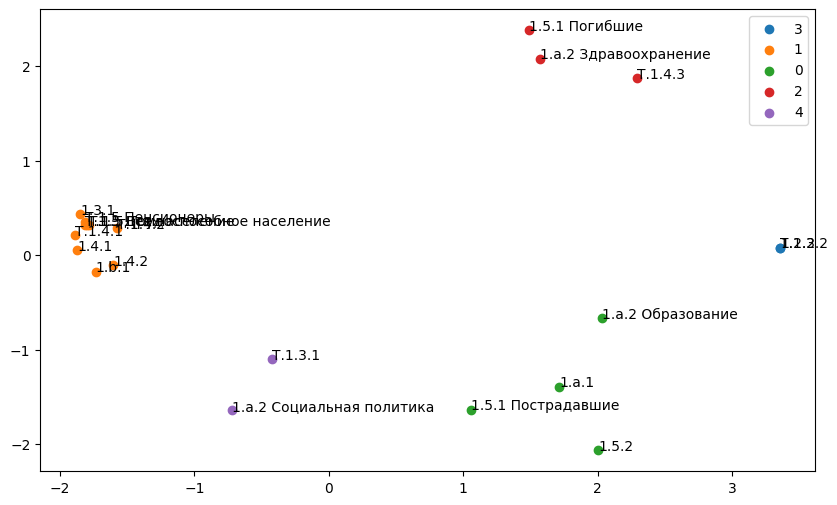

In [32]:
plot_clusters(df_dim_red, "PC1", "PC2", "label")

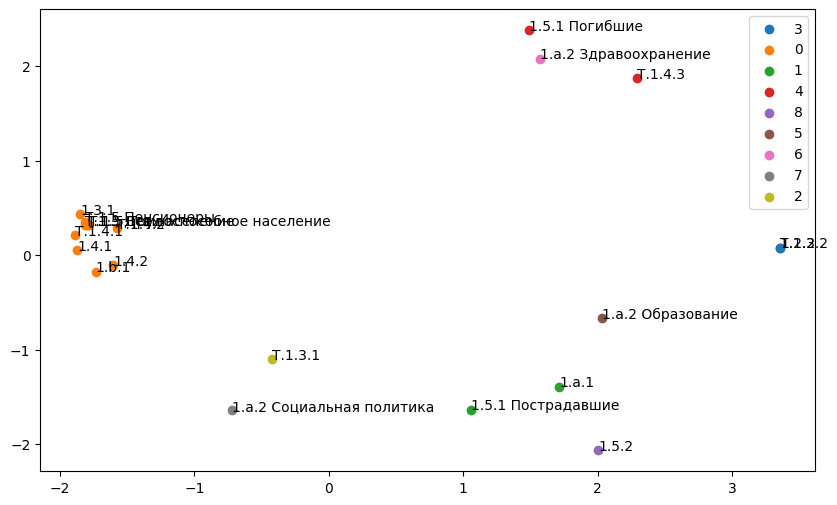

In [33]:
plot_clusters(df_dim_red, "PC1", "PC2", "before_PCA_label")

#### Прогнозирование

Функция для проверки стационарности ряда

In [34]:
def check_stationarity(series):
    # Copied from https://machinelearningmastery.com/time-series-data-stationary-python/

    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

##### ARIMA

In [35]:
scaled_df_ro.T

ЦУР,1.2.2,1.3.1,1.4.1,1.4.2,1.5.1 Пострадавшие,1.5.1 Погибшие,1.5.2,1.а.1,1.а.2 Образование,1.а.2 Здравоохранение,...,1.b.1,Т.1.3.1,Т.1.3.2,Т.1.4.1,Т.1.4.2,Т.1.4.3,Т.1.5 Все население,Т.1.5 Трудоспособное население,Т.1.5 Пенсионеры,Т.1.5 Дети
2016,1.139583,-0.943865,-1.374250,-1.397150,-0.532154,2.330031,-0.624252,0.091718,-0.178962,1.346600,...,-1.098099,-1.818115,1.141200,-1.144248,-0.808576,2.420527,-0.895609,-0.862506,-0.851727,-0.936142
2017,0.882258,-0.972992,-0.906894,-0.909256,2.197795,-0.844113,2.154520,2.178303,0.219636,-1.704392,...,-0.384614,0.040161,0.883232,-0.891007,-0.590042,-0.133933,-0.807040,-0.780026,-0.784064,-0.840258
2018,0.281832,-0.577852,-0.569359,0.044354,-0.984484,-0.404616,0.761413,-0.550308,2.098740,0.572467,...,-0.495293,0.850178,0.281308,-0.574876,-0.395789,-0.460155,-0.800094,-0.778526,-0.774642,-0.815602
2019,0.367607,-0.057960,0.261497,0.709664,-0.925947,-0.453449,-0.631693,-0.710815,0.447406,-0.247202,...,-0.573608,0.326049,0.367297,-0.162438,-0.104411,-0.254494,-0.225267,-0.230409,-0.311276,-0.285956
2020,0.110282,-0.300869,0.123887,-0.325262,0.244791,-0.697614,-0.335757,0.091718,-0.691445,0.572467,...,-0.059154,-0.912801,0.109329,-0.010027,-1.075673,-0.509798,0.170687,0.120507,-0.021780,0.258300
2021,-0.747468,0.850889,0.583454,-0.022177,0.000000,0.034881,-0.657606,-1.192334,-1.090043,0.572467,...,0.394244,1.421955,-0.750563,0.813192,1.133949,-0.637450,0.396449,0.324457,0.597469,0.544126
2022,-2.034094,2.002648,1.881665,1.899828,0.000000,0.034881,-0.666625,0.091718,-0.805331,-1.112408,...,2.216525,0.092573,-2.031803,1.969404,1.840542,-0.424696,2.160873,2.206503,2.146019,2.075532


<Axes: >

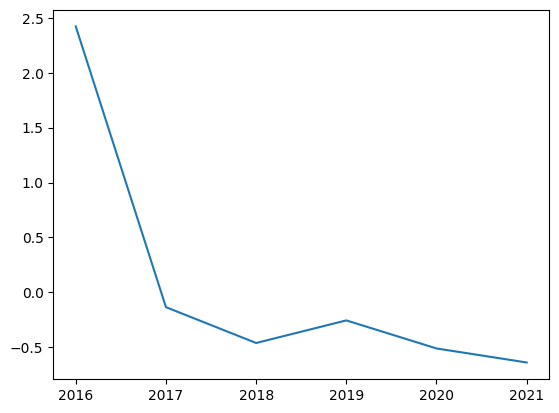

In [36]:
scaled_df_ro.T['Т.1.4.3'][:-1].plot()

In [37]:
check_stationarity(scaled_df_ro.T['Т.1.4.3'][:-1])

ADF Statistic: -13.675274
p-value: 0.000000
Critical Values:
	1%: -6.045
	5%: -3.929
	10%: -2.987
Stationary


Стационарный - ARMA(ARIMA(p,0,q)), не стационарный - ARIMA

p - последний значимый пик pacf, q - последний значимый acf

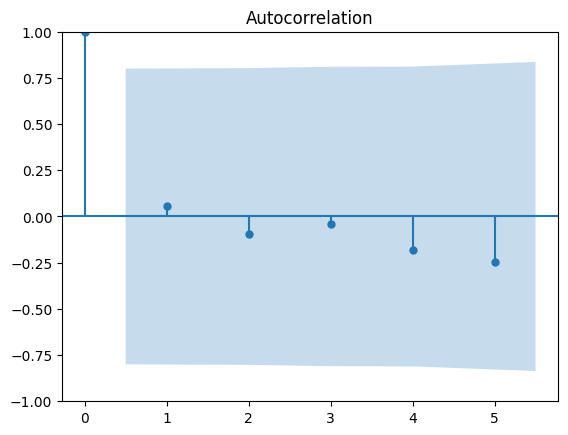

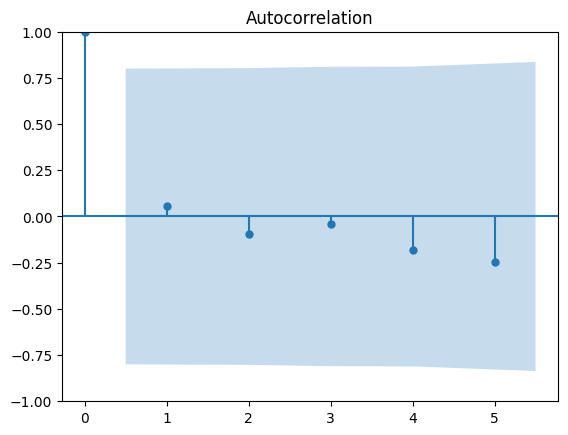

In [38]:
plot_acf(scaled_df_ro.T['Т.1.4.3'].values[:-1], lags=5)

p = 0

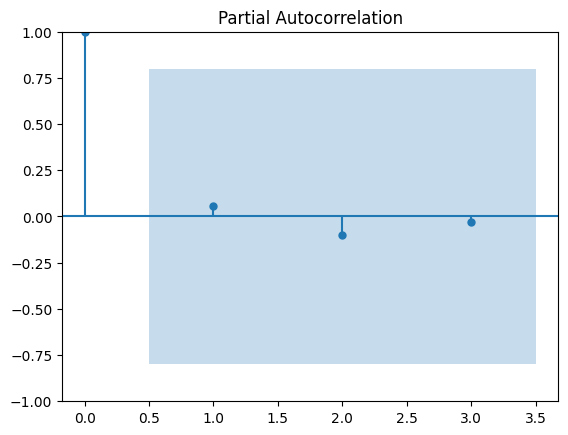

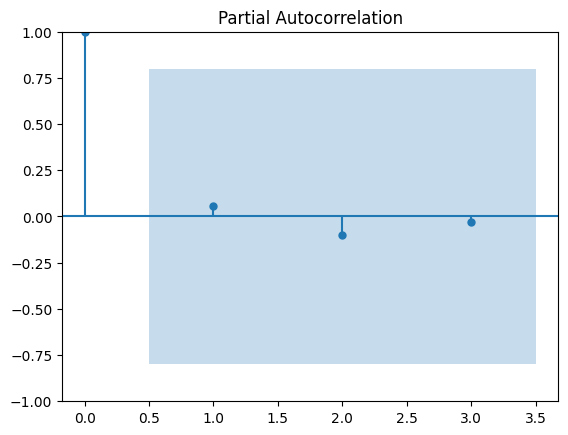

In [39]:
plot_pacf(scaled_df_ro.T['Т.1.4.3'].values[:-1])

q = 0

In [40]:
model = ARIMA(scaled_df_ro.T['Т.1.4.3'][:-1], order=(0, 0, 0))
model_fit = model.fit()

# Вывод статистики модели
print(model_fit.summary())

e:\SDG\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
e:\SDG\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
e:\SDG\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                Т.1.4.3   No. Observations:                    6
Model:                          ARIMA   Log Likelihood                  -8.885
Date:                Sat, 27 Apr 2024   AIC                             21.769
Time:                        13:52:13   BIC                             21.353
Sample:                    01-01-2016   HQIC                            20.102
                         - 01-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0708      1.889      0.037      0.970      -3.631       3.773
sigma2         1.1316      2.310      0.490      0.624      -3.395       5.659
Ljung-Box (L1) (Q):                   0.03   Jarque-

In [41]:
forecast = model_fit.forecast(steps=3)
forecast

2022-01-01    0.070778
2023-01-01    0.070778
2024-01-01    0.070778
Freq: YS-JAN, Name: predicted_mean, dtype: float64

In [100]:
autoarima = AutoARIMA(seasonal=False, start_p=0, start_q=0, out_of_sample_size=1)

In [64]:
np.array(scaled_df_ro.T['1.2.2'][:-1])

array([ 1.13958266,  0.88225755,  0.28183227,  0.36760731,  0.11028219,
       -0.7474682 ])

In [90]:
scaled_df_ro.T['Т.1.4.3'][:-1].reset_index().drop("index", axis=1)

,Т.1.4.3
0,2.420527
1,-0.133933
2,-0.460155
3,-0.254494
4,-0.509798
5,-0.637450


In [106]:
pred = autoarima.fit_predict(scaled_df_ro.T['1.5.2'].reset_index().drop("index", axis=1), fh=[1])

e:\SDG\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
e:\SDG\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
e:\SDG\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
e:\SDG\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
e:\SDG\venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros 

In [107]:
pred

,1.5.2
7,0.0


In [108]:
autoarima.get_params()

{'D': None,
 'alpha': 0.05,
 'concentrate_scale': False,
 'd': None,
 'enforce_invertibility': True,
 'enforce_stationarity': True,
 'error_action': 'warn',
 'hamilton_representation': False,
 'information_criterion': 'aic',
 'max_D': 1,
 'max_P': 2,
 'max_Q': 2,
 'max_d': 2,
 'max_order': 5,
 'max_p': 5,
 'max_q': 5,
 'maxiter': 50,
 'measurement_error': False,
 'method': 'lbfgs',
 'mle_regression': True,
 'n_fits': 10,
 'n_jobs': 1,
 'offset_test_args': None,
 'out_of_sample_size': 1,
 'random': False,
 'random_state': None,
 'scoring': 'mse',
 'scoring_args': None,
 'seasonal': False,
 'seasonal_test': 'ocsb',
 'seasonal_test_args': None,
 'simple_differencing': False,
 'sp': 1,
 'start_P': 1,
 'start_Q': 1,
 'start_p': 0,
 'start_params': None,
 'start_q': 0,
 'stationary': False,
 'stepwise': True,
 'suppress_warnings': False,
 'test': 'kpss',
 'time_varying_regression': False,
 'trace': False,
 'trend': None,
 'update_pdq': True,
 'with_intercept': True}

##### ARCH

In [47]:
scaled_df_ro.T

ЦУР,1.2.2,1.3.1,1.4.1,1.4.2,1.5.1 Пострадавшие,1.5.1 Погибшие,1.5.2,1.а.1,1.а.2 Образование,1.а.2 Здравоохранение,...,1.b.1,Т.1.3.1,Т.1.3.2,Т.1.4.1,Т.1.4.2,Т.1.4.3,Т.1.5 Все население,Т.1.5 Трудоспособное население,Т.1.5 Пенсионеры,Т.1.5 Дети
2016,1.139583,-0.943865,-1.374250,-1.397150,-0.532154,2.330031,-0.624252,0.091718,-0.178962,1.346600,...,-1.098099,-1.818115,1.141200,-1.144248,-0.808576,2.420527,-0.895609,-0.862506,-0.851727,-0.936142
2017,0.882258,-0.972992,-0.906894,-0.909256,2.197795,-0.844113,2.154520,2.178303,0.219636,-1.704392,...,-0.384614,0.040161,0.883232,-0.891007,-0.590042,-0.133933,-0.807040,-0.780026,-0.784064,-0.840258
2018,0.281832,-0.577852,-0.569359,0.044354,-0.984484,-0.404616,0.761413,-0.550308,2.098740,0.572467,...,-0.495293,0.850178,0.281308,-0.574876,-0.395789,-0.460155,-0.800094,-0.778526,-0.774642,-0.815602
2019,0.367607,-0.057960,0.261497,0.709664,-0.925947,-0.453449,-0.631693,-0.710815,0.447406,-0.247202,...,-0.573608,0.326049,0.367297,-0.162438,-0.104411,-0.254494,-0.225267,-0.230409,-0.311276,-0.285956
2020,0.110282,-0.300869,0.123887,-0.325262,0.244791,-0.697614,-0.335757,0.091718,-0.691445,0.572467,...,-0.059154,-0.912801,0.109329,-0.010027,-1.075673,-0.509798,0.170687,0.120507,-0.021780,0.258300
2021,-0.747468,0.850889,0.583454,-0.022177,0.000000,0.034881,-0.657606,-1.192334,-1.090043,0.572467,...,0.394244,1.421955,-0.750563,0.813192,1.133949,-0.637450,0.396449,0.324457,0.597469,0.544126
2022,-2.034094,2.002648,1.881665,1.899828,0.000000,0.034881,-0.666625,0.091718,-0.805331,-1.112408,...,2.216525,0.092573,-2.031803,1.969404,1.840542,-0.424696,2.160873,2.206503,2.146019,2.075532


In [48]:
scaled_df_ro.T['1.2.2'][:].values

array([ 1.13958266,  0.88225755,  0.28183227,  0.36760731,  0.11028219,
       -0.7474682 , -2.03409379])

In [49]:
am = arch_model(scaled_df_ro.T['1.2.2'][:-1].values)

In [50]:
res = am.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 509.56047204757346
Iteration:      2,   Func. Count:     13,   Neg. LLF: 5.468500377916435
Iteration:      3,   Func. Count:     18,   Neg. LLF: 5.467324400319608
Iteration:      4,   Func. Count:     23,   Neg. LLF: 5.467065895639291
Iteration:      5,   Func. Count:     28,   Neg. LLF: 5.467063070835816
Iteration:      6,   Func. Count:     33,   Neg. LLF: 5.467051743604748
Iteration:      7,   Func. Count:     38,   Neg. LLF: 5.467046853389537
Iteration:      8,   Func. Count:     43,   Neg. LLF: 5.467043958835195
Iteration:      9,   Func. Count:     47,   Neg. LLF: 5.4670439588082065
Optimization terminated successfully    (Exit mode 0)
            Current function value: 5.467043958835195
            Iterations: 9
            Function evaluations: 47
            Gradient evaluations: 9


In [51]:
forecast = res.forecast(horizon=3, method='simulation')

In [52]:
forecast.variance

,h.1,h.2,h.3
5,0.34826,0.348254,0.348251
